# Get data from DB

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
    host="sv-procon.uet.vnu.edu.vn",
    user="root",
    passwd="iotlab2018",
    database="irrigation_database"
)
print(mydb)
mycursor = mydb.cursor()
mycursor.execute("select * from Sensing")
myresult = mycursor.fetchall()

In [2]:
import pandas as pd
columns=['SensingID','DeviceID','PlotID','SoilMoisture','Humidity','Temperature','LightLevel','TimeOfMeasurement']
data = pd.DataFrame(myresult,columns=columns)
data

,SensingID,DeviceID,PlotID,SoilMoisture,Humidity,Temperature,LightLevel,TimeOfMeasurement
0,1,81604378625,1,47.4427,94.2,26.0,0,2020-04-20 01:18:41
1,2,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:19:01
2,3,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:19:21
3,4,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:19:41
4,5,81604378625,1,47.4427,94.2,25.9,0,2020-04-20 01:20:01
...,...,...,...,...,...,...,...,...
20613,20717,68719476737,1,72.8997,82.3,32.2,193,2020-05-09 16:00:46
20614,20718,68719476737,1,73.0978,82.4,32.2,193,2020-05-09 16:01:06
20615,20719,68719476737,1,72.8997,82.3,32.1,190,2020-05-09 16:01:26
20616,20720,68719476737,1,72.8997,82.3,32.1,186,2020-05-09 16:01:46


In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(60, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data.SoilMoisture[:])
# plt.plot(data.Temperature[10580:12000])
# plt.plot(data.Temperature)
# plt.plot(data.Humidity)
data_eva=[]
data_eva.append(data[80:3965])
data_eva.append(data[6070:10565])
data_eva.append(data[10580:10780])
data_eva.append(data[12500:15460])
data_eva.append(data[15580:16450])
data_eva.append(data[16580:20310])
data_eva.append(data[20320:])


In [4]:
len(data_eva)

7

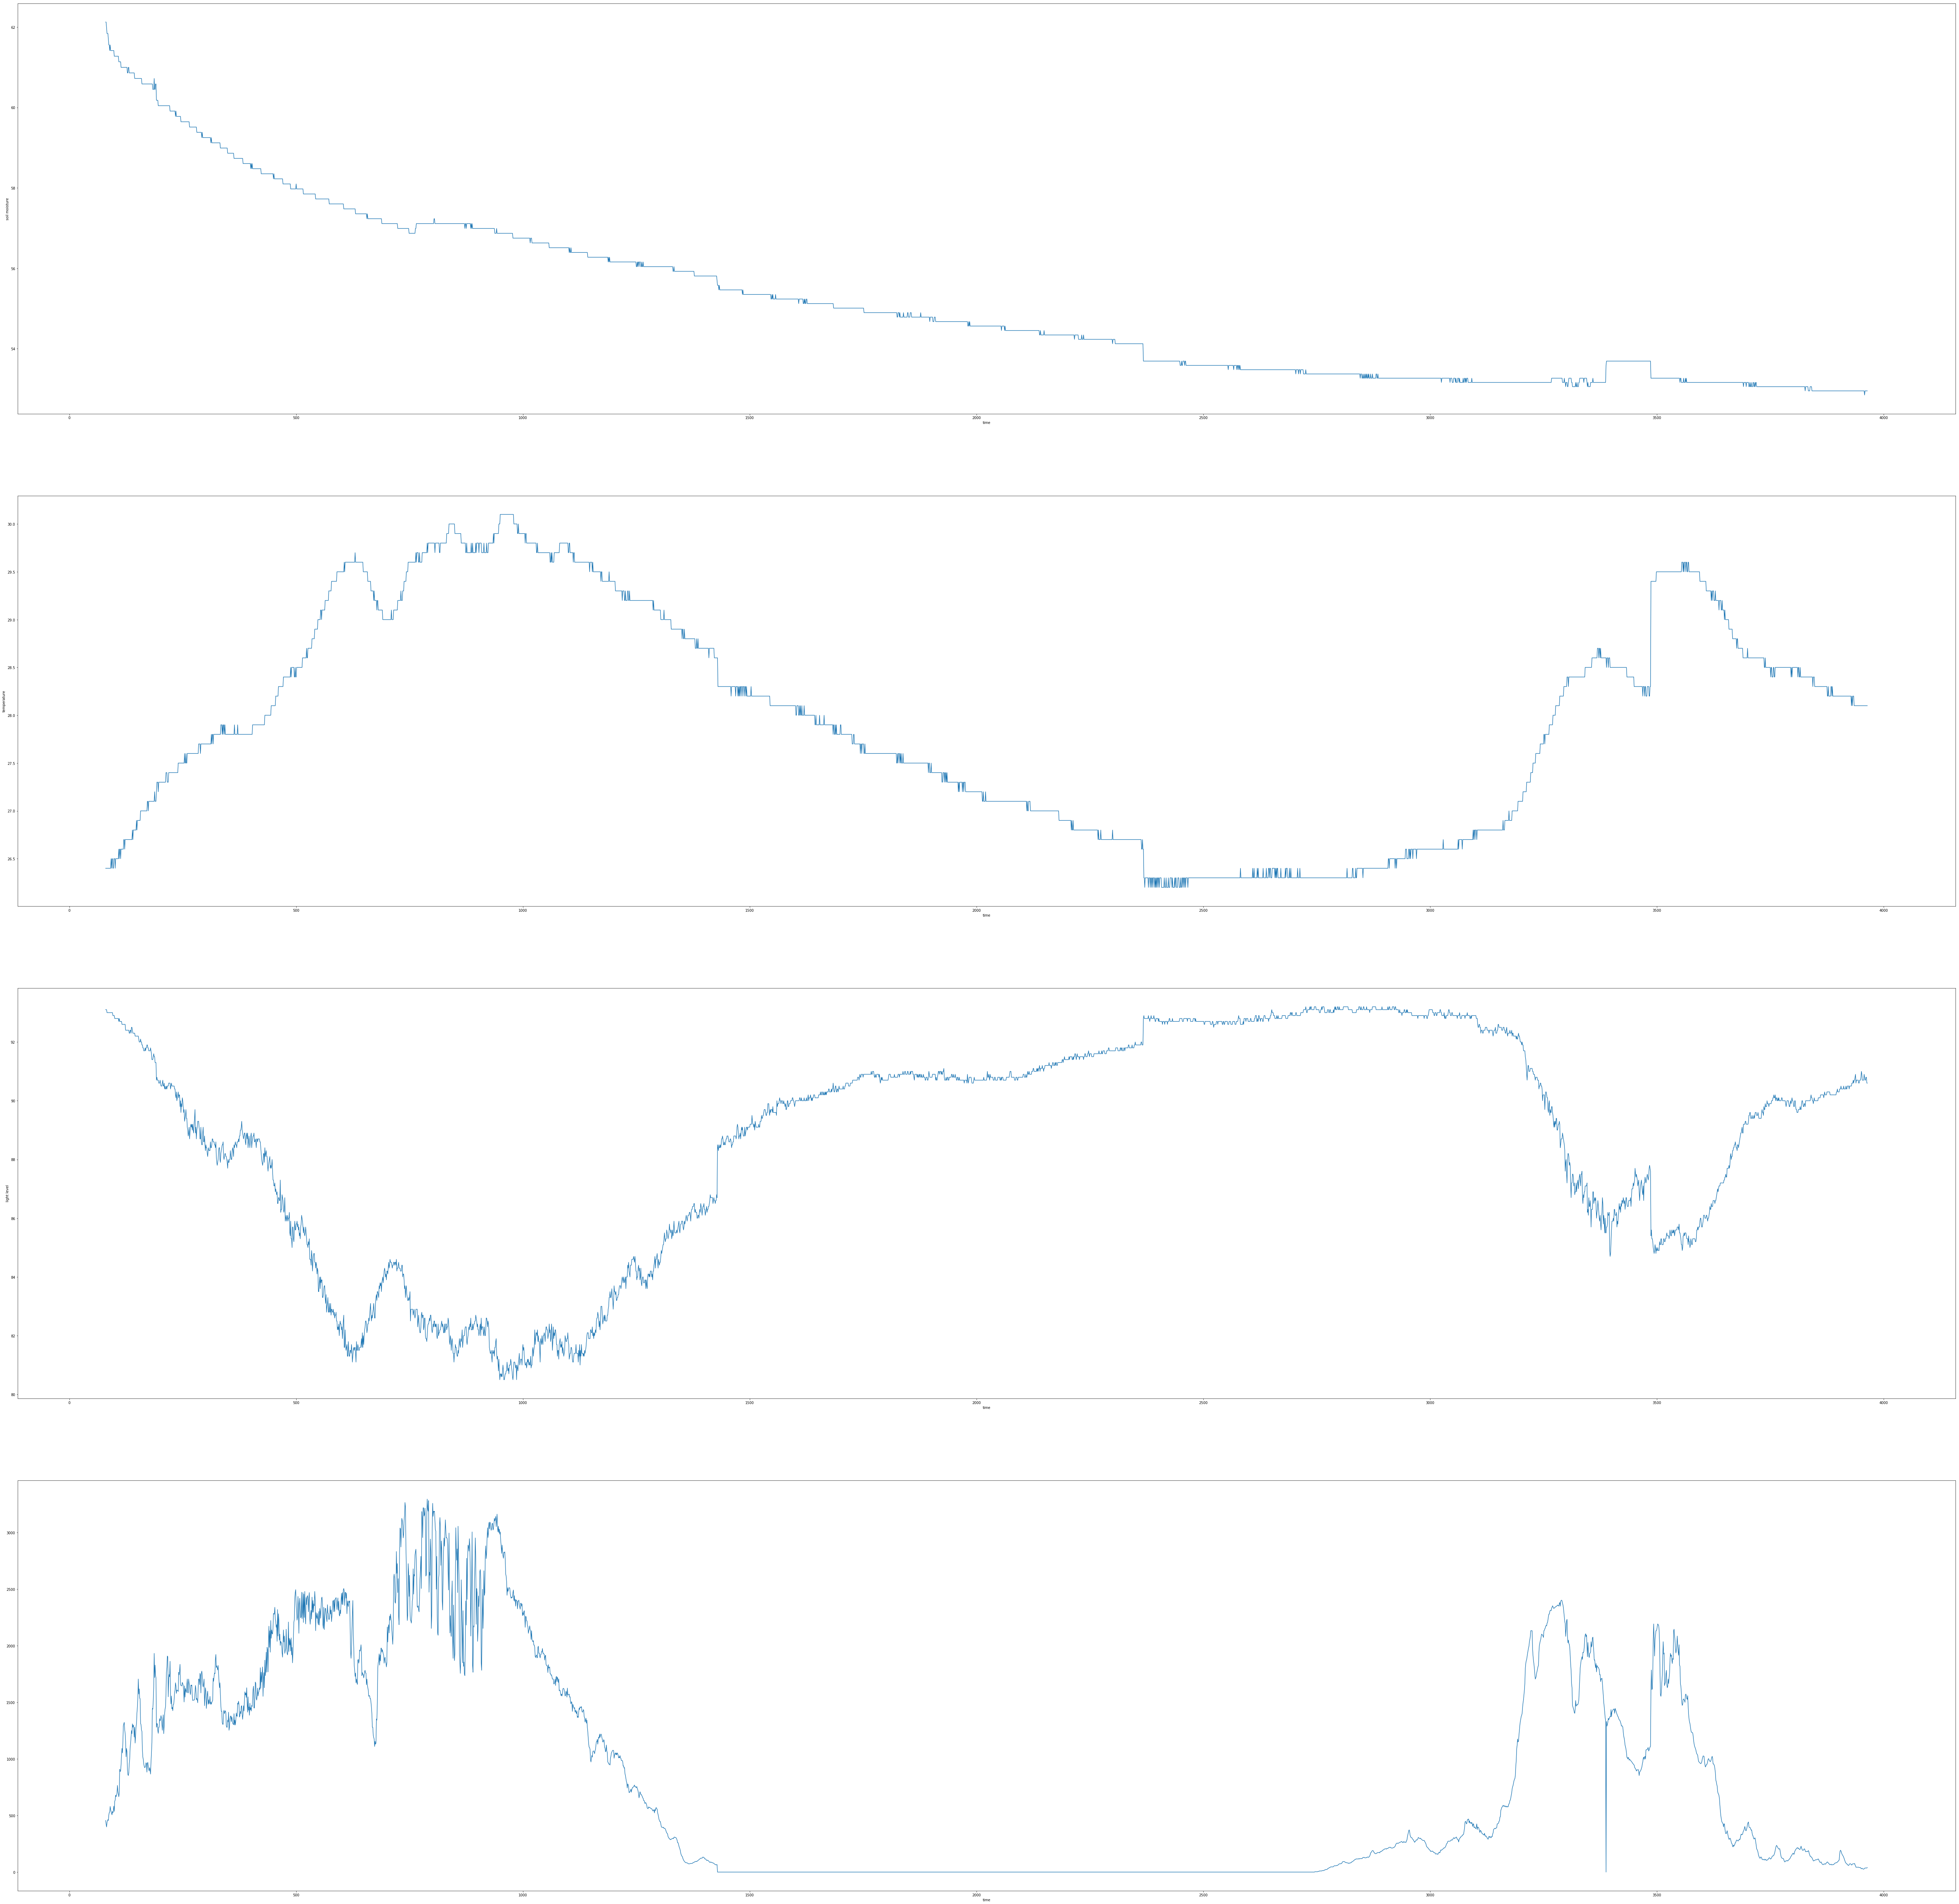

In [19]:

fig,axs = plt.subplots(4,1,figsize=(100,100))
# for i in range(len(data_eva)):
#     axs[i//2,i%2].plot(data_eva[i].SoilMoisture)
axs[0].plot(data_eva[0].SoilMoisture)
axs[1].plot(data_eva[0].Temperature)
axs[2].plot(data_eva[0].Humidity)
axs[3].plot(data_eva[0].LightLevel)

axs[0].set_xlabel('time')
axs[1].set_xlabel('time')
axs[2].set_xlabel('time')
axs[3].set_xlabel('time')

axs[0].set_ylabel('soil moisture')
axs[1].set_ylabel('temperature')
axs[2].set_ylabel('humidity')
axs[2].set_ylabel('light level')

plt.show()

In [20]:
from scipy.signal import savgol_filter

for i in range(len(data_eva)):
    data_eva[i].SoilMoisture = savgol_filter(data_eva[i].SoilMoisture, 101, 1)
    data_eva[i].Humidity = savgol_filter(data_eva[i].Humidity, 101, 1)
    data_eva[i].Temperature = savgol_filter(data_eva[i].Temperature, 101, 1)
    data_eva[i].LightLevel = savgol_filter(data_eva[i].LightLevel, 101, 1)

/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/pandas/core/generic.py:5302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


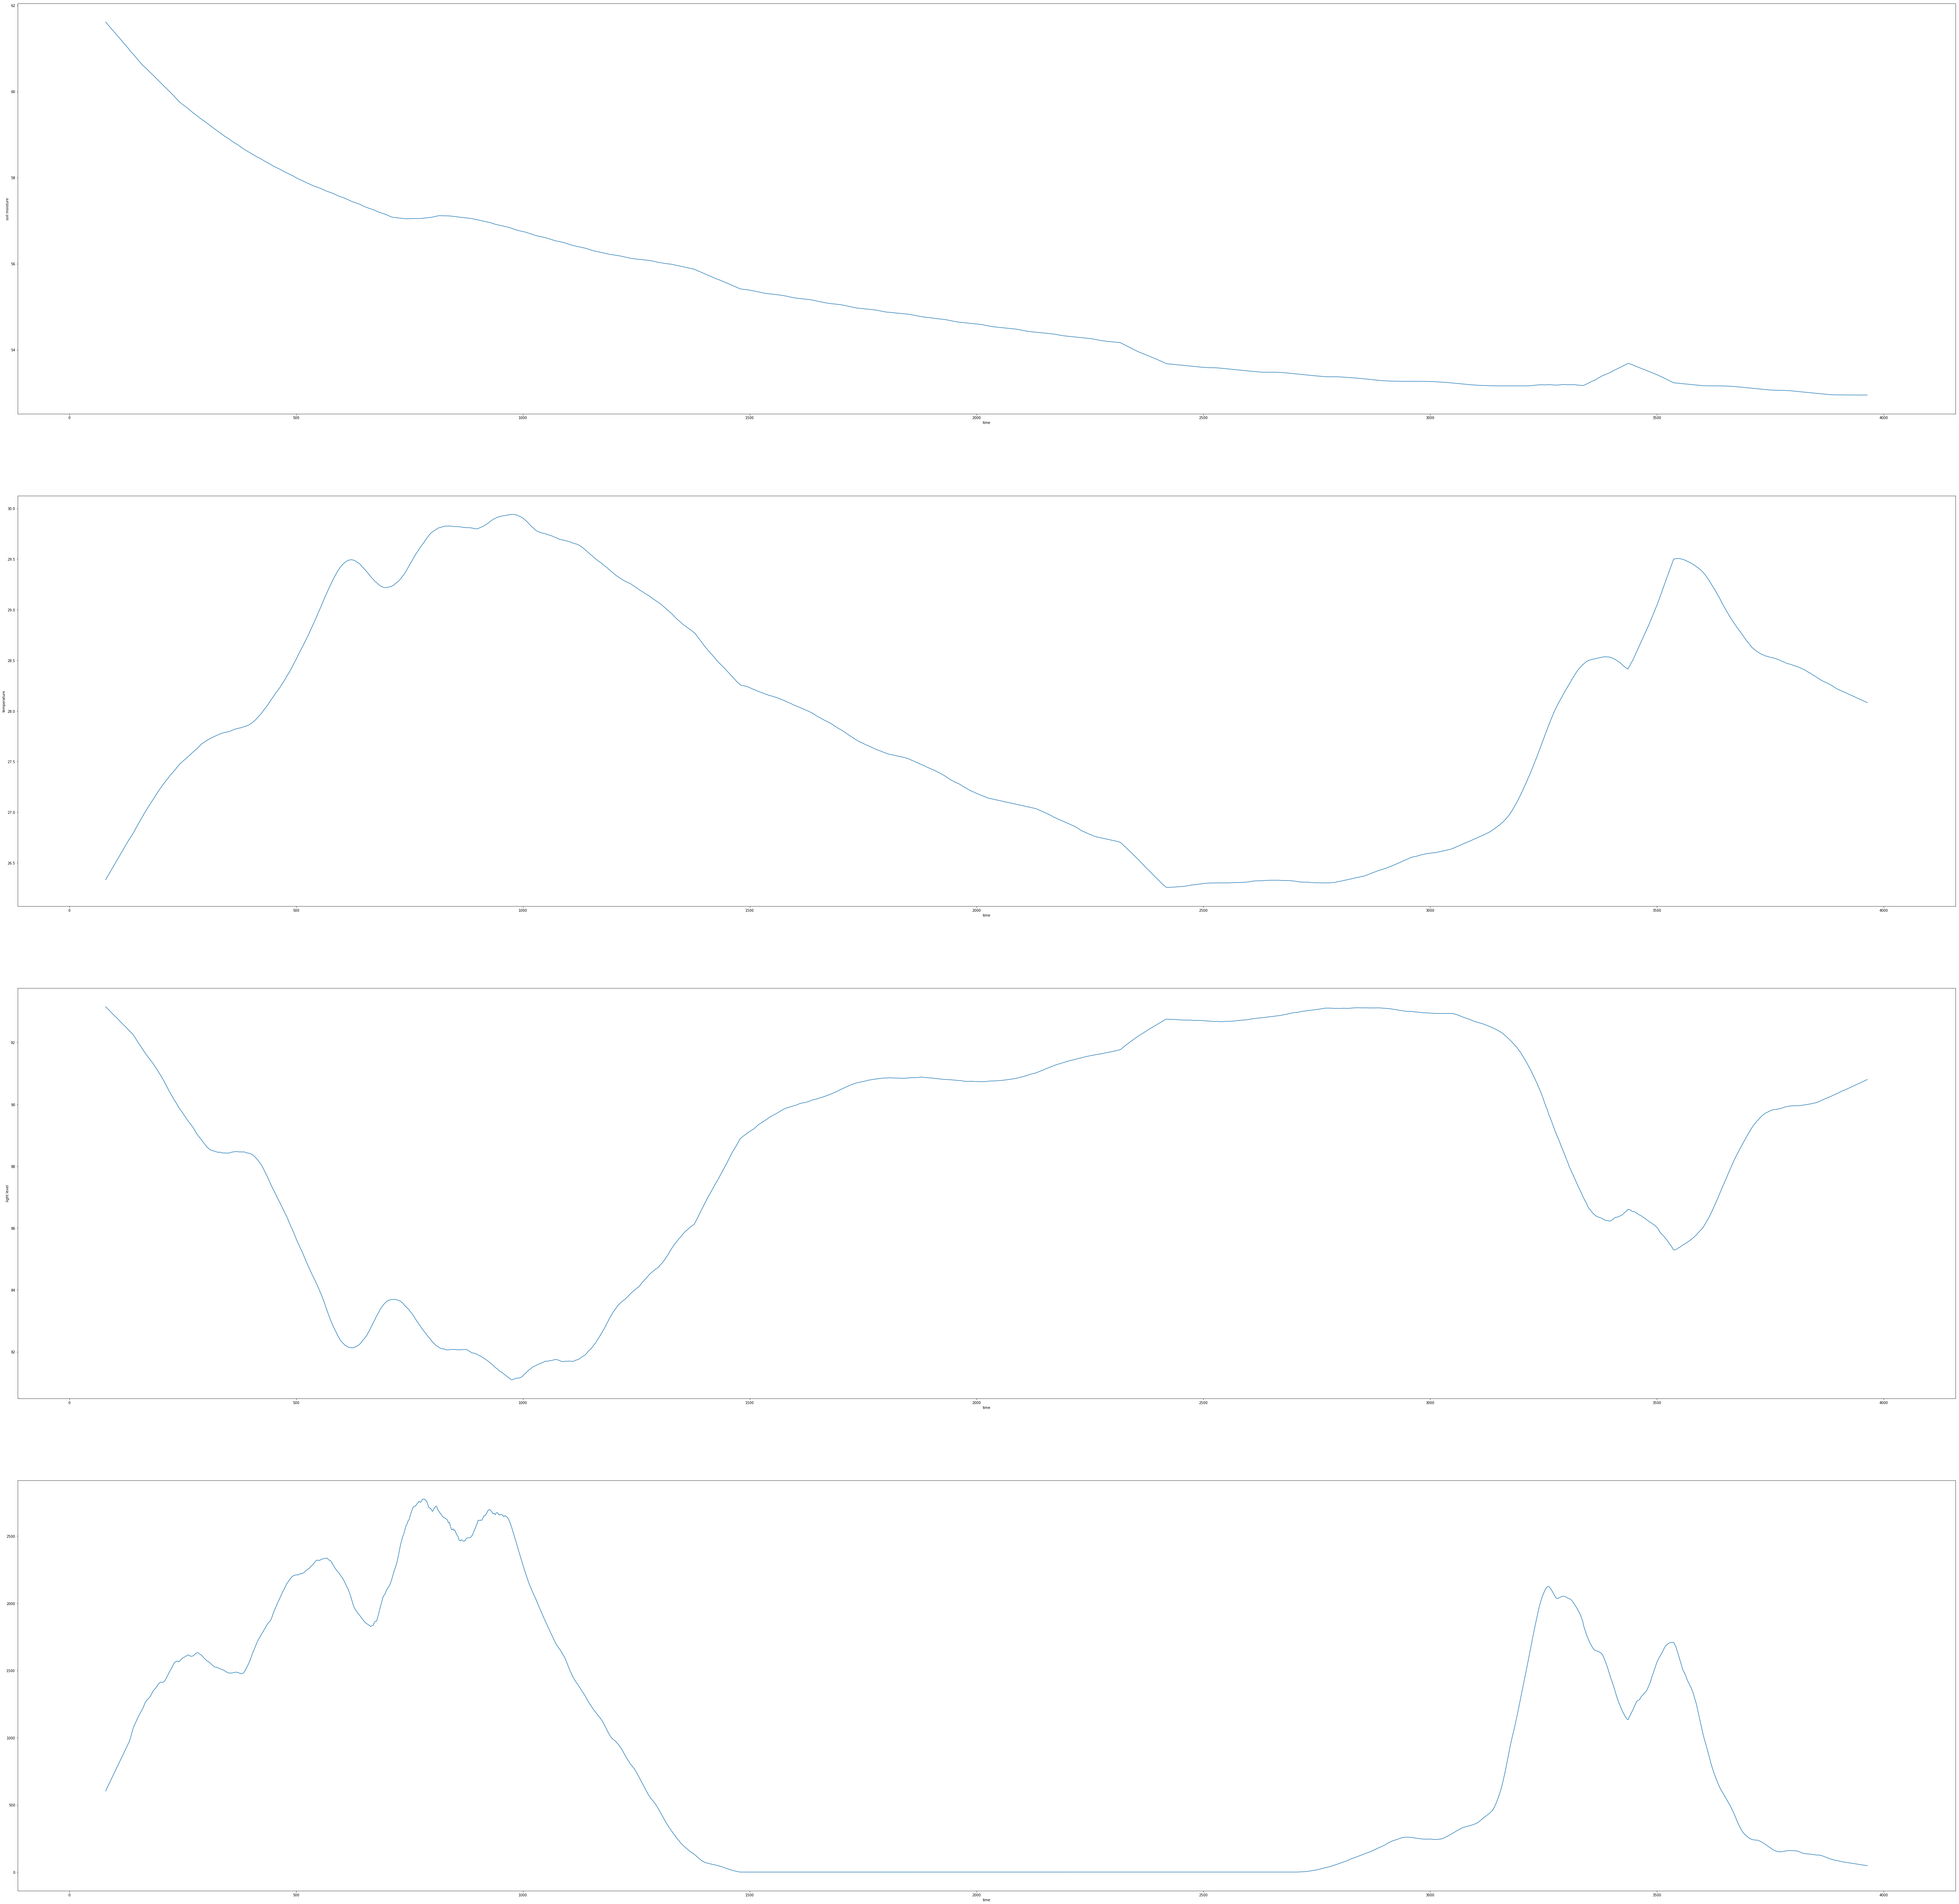

In [21]:
fig,axs = plt.subplots(4,1,figsize=(100,100))
# for i in range(len(data_eva)):
#     axs[i//2,i%2].plot(data_eva[i].SoilMoisture)
axs[0].plot(data_eva[0].SoilMoisture)
axs[1].plot(data_eva[0].Temperature)
axs[2].plot(data_eva[0].Humidity)
axs[3].plot(data_eva[0].LightLevel)

axs[0].set_xlabel('time')
axs[1].set_xlabel('time')
axs[2].set_xlabel('time')
axs[3].set_xlabel('time')

axs[0].set_ylabel('soil moisture')
axs[1].set_ylabel('temperature')
axs[2].set_ylabel('humidity')
axs[2].set_ylabel('light level')

plt.show()

# Pre-processing

In [320]:
print(data_eva[1].index)

RangeIndex(start=6070, stop=10565, step=1)


In [325]:
dSoilMoisture = [None for i in range(len(data))]
dSoilMoisture=pd.Series(dSoilMoisture)
interval = 60 #second
start_index=int(interval/20)
for index in range(len(data_eva)):
    for i in data_eva[index].index:
        if (i<data_eva[index].index.stop-start_index):
           dSoilMoisture[i]=data.SoilMoisture[i+start_index]-data.SoilMoisture[i]

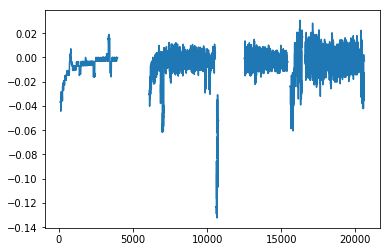

In [326]:
# dSoilMoisture.max()
plt.plot(dSoilMoisture[:])
# plt.plot(data.SoilMoisture[10000:11000])
# plt.plot(data.SoilMoisture[7000:7050])

In [327]:
# for i in range(len(dSoilMoisture)):
#     if (dSoilMoisture[i] is not None) and ((dSoilMoisture[i])<-2 or (dSoilMoisture[i])>0):
#         dSoilMoisture[i] = None
# plt.plot(dSoilMoisture[4000:6000])
# plt.plot()

In [328]:
data['dSoilMoisture']=dSoilMoisture

In [329]:
data_use = data[['SoilMoisture','Humidity','Temperature','dSoilMoisture']]
# plt.plot(data_use.dSoilMoisture)

In [330]:
remove_rows=[i for i in range(len(data_use)) if data_use.dSoilMoisture[i] is None]

In [331]:
data_use = data_use.drop(remove_rows,axis=0)

In [332]:
data_use = (data_use.reset_index()).drop(['index'],axis=1)
data_use.dSoilMoisture = data_use.dSoilMoisture*(-1)

In [343]:
data_use.dSoilMoisture = data_use.dSoilMoisture.astype(float)

In [344]:
data_use.corr()

,SoilMoisture,Humidity,Temperature,dSoilMoisture
SoilMoisture,1.000000,-0.016482,0.542852,0.304449
Humidity,-0.016482,1.000000,0.108349,0.016394
Temperature,0.542852,0.108349,1.000000,0.017708
dSoilMoisture,0.304449,0.016394,0.017708,1.000000


### Scale train dataset

In [345]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [346]:
def scaleData(min_value, max_value, min_range, max_range, value):
    return min_range+((value-min_value)*(max_range-min_range))/(max_value-min_value)
def scaleDatas(min_value, max_value, min_range, max_range, values):
    values_ret=[]
    for i in range(len(values)):
        values_ret.append(scaleData(min_value, max_value, min_range, max_range, values[i]));
    return values_ret

In [538]:
data_use.dSoilMoisture.max()

0.1323534653465117

In [539]:
max_soilmoisture = 100
min_soilmoisture = 0
max_humidity = 100
min_humidity = 0
max_temperature = 50
min_temperature = 10
max_dSoilmoisture = 0.14
min_dSoilmoisture = -0.04

In [540]:
scale_soilmoisture = scaleDatas(min_soilmoisture,max_soilmoisture,0,1,data_use.SoilMoisture)
scale_humidity = scaleDatas(min_humidity,max_humidity,0,1,data_use.Humidity)
scale_temperature = scaleDatas(min_temperature,max_temperature,0,1,data_use.Temperature)
scale_dSoilMoisture = scaleDatas(min_dSoilmoisture,max_dSoilmoisture,0,1,data_use.dSoilMoisture)

In [541]:
temp = {data_use.columns[0]:scale_soilmoisture,
        data_use.columns[1]:scale_humidity,
       data_use.columns[2]:scale_temperature,
       data_use.columns[3]:scale_dSoilMoisture}
scale_data_use = pd.DataFrame(temp)

In [542]:
scale_data_use.corr()

,SoilMoisture,Humidity,Temperature,dSoilMoisture
SoilMoisture,1.000000,-0.016482,0.542852,0.304449
Humidity,-0.016482,1.000000,0.108349,0.016394
Temperature,0.542852,0.108349,1.000000,0.017708
dSoilMoisture,0.304449,0.016394,0.017708,1.000000


### Split data

In [543]:
X_data = np.transpose([scale_data_use.SoilMoisture.to_list(),
          scale_data_use.Humidity.to_list(),
          scale_data_use.Temperature.to_list()])
y_data = scale_data_use.dSoilMoisture.to_list()

In [544]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size =  0.2, random_state = 42)

# Training

In [619]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import LeakyReLU
def create_mlp(dim, regress=False):
    # define our MLP network
    model = Sequential()
    
    model.add(Dense(100, input_dim=dim, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100,activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dropout(0.2))
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"))
    # return our model
    return model

In [620]:
model = create_mlp(3,True)
model.compile(loss="mse", optimizer='adam')
model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), epochs=200, batch_size=int(len(X_train)))

Train on 13133 samples, validate on 3284 samples
Epoch 1/200
13133/13133 [==============================] - 4s 301us/step - loss: 0.0620 - val_loss: 0.0405
Epoch 2/200
13133/13133 [==============================] - 0s 5us/step - loss: 0.0393 - val_loss: 0.0241
Epoch 3/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0244 - val_loss: 0.0124
Epoch 4/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0143 - val_loss: 0.0064
Epoch 5/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0098 - val_loss: 0.0061
Epoch 6/200
13133/13133 [==============================] - 0s 8us/step - loss: 0.0105 - val_loss: 0.0087
Epoch 7/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0145 - val_loss: 0.0106
Epoch 8/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0170 - val_loss: 0.0105
Epoch 9/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0167 - val_loss: 0.0091
Epoc

Epoch 78/200
13133/13133 [==============================] - 0s 8us/step - loss: 0.0067 - val_loss: 0.0059
Epoch 79/200
13133/13133 [==============================] - 0s 8us/step - loss: 0.0067 - val_loss: 0.0059
Epoch 80/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0067 - val_loss: 0.0059
Epoch 81/200
13133/13133 [==============================] - 0s 8us/step - loss: 0.0067 - val_loss: 0.0059
Epoch 82/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0067 - val_loss: 0.0060
Epoch 83/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0065 - val_loss: 0.0060
Epoch 84/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0067 - val_loss: 0.0061
Epoch 85/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0067 - val_loss: 0.0061
Epoch 86/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0066 - val_loss: 0.0060
Epoch 87/200
13133/13133 [====================

Epoch 155/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0059 - val_loss: 0.0054
Epoch 156/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0059 - val_loss: 0.0054
Epoch 157/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0059 - val_loss: 0.0054
Epoch 158/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0059 - val_loss: 0.0054
Epoch 159/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0058 - val_loss: 0.0054
Epoch 160/200
13133/13133 [==============================] - 0s 8us/step - loss: 0.0058 - val_loss: 0.0054
Epoch 161/200
13133/13133 [==============================] - 0s 6us/step - loss: 0.0059 - val_loss: 0.0054
Epoch 162/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0058 - val_loss: 0.0053
Epoch 163/200
13133/13133 [==============================] - 0s 7us/step - loss: 0.0058 - val_loss: 0.0053
Epoch 164/200
13133/13133 [==========

In [623]:
model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), epochs=2000, batch_size=int(len(X_train)))

Train on 13133 samples, validate on 3284 samples
Epoch 1/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 2/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0052 - val_loss: 0.0046
Epoch 3/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 4/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 5/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0050 - val_loss: 0.0045
Epoch 6/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 7/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0050 - val_loss: 0.0044
Epoch 8/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0049 - val_loss: 0.0044
Epoch 9/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0050 - val_loss: 0.00

13133/13133 [==============================] - 0s 10us/step - loss: 0.0041 - val_loss: 0.0035
Epoch 78/2000
13133/13133 [==============================] - 0s 9us/step - loss: 0.0040 - val_loss: 0.0035
Epoch 79/2000
13133/13133 [==============================] - 0s 10us/step - loss: 0.0040 - val_loss: 0.0035
Epoch 80/2000
13133/13133 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 81/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0040 - val_loss: 0.0035
Epoch 82/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0040 - val_loss: 0.0035
Epoch 83/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0041 - val_loss: 0.0035
Epoch 84/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0040 - val_loss: 0.0035
Epoch 85/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0040 - val_loss: 0.0035
Epoch 86/2000
13133/13133 [======================

Epoch 154/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 0.0034
Epoch 155/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0039 - val_loss: 0.0034
Epoch 156/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0040 - val_loss: 0.0034
Epoch 157/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 158/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 159/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 160/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 161/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0039 - val_loss: 0.0034
Epoch 162/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0039 - val_loss: 0.0034
Epoch 163/2000
13133/13133 [

Epoch 230/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 231/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 232/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 233/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 234/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 235/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 236/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 237/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 238/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 239/2000
13133/13133 [

Epoch 306/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 307/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 308/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 309/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 310/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 311/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 312/2000
13133/13133 [==============================] - 0s 9us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 313/2000
13133/13133 [==============================] - 0s 9us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 314/2000
13133/13133 [==============================] - 0s 11us/step - loss: 0.0037 - val_loss: 0.0034
Epoch 315/2000
13133/13133 

Epoch 382/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 383/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 384/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 385/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 386/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 387/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 388/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 389/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0035 - val_loss: 0.0034
Epoch 390/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0036 - val_loss: 0.0034
Epoch 391/2000
13133/13133 [

Epoch 458/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 459/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 460/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0036 - val_loss: 0.0033
Epoch 461/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 462/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0036 - val_loss: 0.0033
Epoch 463/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0036 - val_loss: 0.0033
Epoch 464/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 465/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 466/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0036 - val_loss: 0.0033
Epoch 467/2000
13133/13133 [

Epoch 534/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 535/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 536/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 537/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 538/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 539/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 540/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 541/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 542/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 543/2000
13133/13133 [

Epoch 610/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 611/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 612/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 613/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 614/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 615/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 616/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 617/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 618/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 619/2000
13133/13133 [

Epoch 686/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 687/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 688/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 689/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 690/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 691/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 692/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 693/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 694/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 695/2000
13133/13133 [

Epoch 762/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 763/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 764/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 765/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 766/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 767/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 768/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 769/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 770/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 771/2000
13133/13133 [

Epoch 838/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 839/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 840/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 841/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 842/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 843/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 844/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 845/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 846/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 847/2000
13133/13133 [

Epoch 914/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 915/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 916/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 917/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 918/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 919/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 920/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 921/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 922/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 923/2000
13133/13133 [

Epoch 990/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 991/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 992/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 993/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 994/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 995/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0032
Epoch 996/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 997/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 998/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 999/2000
13133/13133 [

Epoch 1066/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 1067/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 1068/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 1069/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 1070/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 1071/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1072/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 1073/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0031 - val_loss: 0.0031
Epoch 1074/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 1075/2000
131

Epoch 1142/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1143/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1144/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1145/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1146/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1147/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1148/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1149/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1150/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1151/2000
131

Epoch 1218/2000
13133/13133 [==============================] - 0s 8us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 1219/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 1220/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 1221/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 1222/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 1223/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1224/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 1225/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 1226/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 1227/2000
131

Epoch 1294/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1295/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1296/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 1297/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1298/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1299/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1300/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1301/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1302/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1303/2000
131

Epoch 1370/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1371/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1372/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1373/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1374/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1375/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1376/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1377/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1378/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1379/2000
131

Epoch 1446/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1447/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1448/2000
13133/13133 [==============================] - 0s 10us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1449/2000
13133/13133 [==============================] - 0s 9us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1450/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1451/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1452/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 1453/2000
13133/13133 [==============================] - 0s 7us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1454/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1455/2000
13

13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1522/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1523/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1524/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1525/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1526/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1527/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1528/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1529/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 1530/2000
13133/13133 [======

Epoch 1597/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1598/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1599/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1600/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1601/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1602/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1603/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1604/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1605/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0029 - val_loss: 0.0027
Epoch 1606/2000
131

Epoch 1673/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1674/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1675/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1676/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1677/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 1678/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1679/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0029 - val_loss: 0.0026
Epoch 1680/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1681/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1682/2000
131

Epoch 1749/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1750/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1751/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1752/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1753/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1754/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 1755/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 1756/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 1757/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1758/2000
131

Epoch 1825/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1826/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1827/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 1828/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 1829/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1830/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1831/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 1832/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 1833/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1834/2000
131

13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1901/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0028 - val_loss: 0.0026
Epoch 1902/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1903/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1904/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1905/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1906/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1907/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1908/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1909/2000
13133/13133 [======

Epoch 1976/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1977/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1978/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1979/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1980/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1981/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1982/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 1983/2000
13133/13133 [==============================] - 0s 6us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1984/2000
13133/13133 [==============================] - 0s 5us/step - loss: 0.0027 - val_loss: 0.0025
Epoch 1985/2000
131

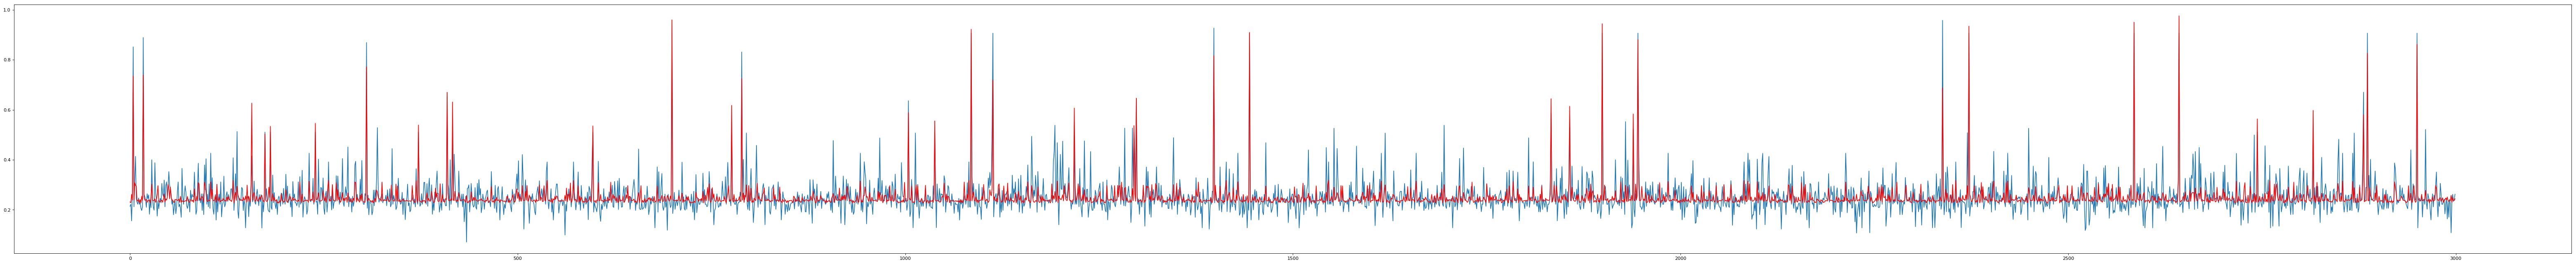

In [624]:
result=(model.predict(np.array(X_test)))
start = 0
figure(num=None, figsize=(100, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_test[start:start+3000],'-',)
plt.plot(result[start:start+3000],'r-')
plt.show()

In [626]:
model.save('eva.h5')

In [654]:
hu=70
soi=80
tem=31
soi = scaleData(min_soilmoisture,max_soilmoisture,0,1,soi)
hu = scaleData(min_humidity,max_humidity,0,1,hu)
temp = scaleData(min_temperature,max_temperature,0,1,tem)
model.predict(np.array([soi,hu,temp]).reshape(1,-1))

array([[0.28929454]], dtype=float32)

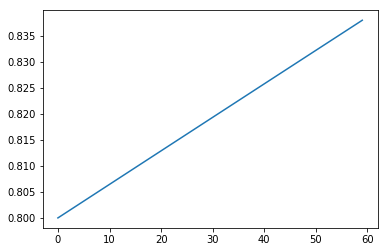

In [669]:
def nextSM(model,sc_soi,sc_hu,sc_tem,i,a):
    if(i>=60):
        return sc_soi,a
    else:
        a.append(sc_soi)
        sc_d_soi=model.predict(np.array([sc_soi,sc_hu,sc_tem]).reshape(1,-1))
        
        soi = scaleData(0,1,min_soilmoisture,max_soilmoisture,sc_soi)
        d_soi = scaleData(0,1,min_dSoilmoisture,max_dSoilmoisture,sc_d_soi)
        soi -= d_soi
        sc_soi = scaleData(min_soilmoisture,max_soilmoisture,0,1,soi)
        nextSM(model,sc_soi,sc_hu,sc_tem,i+1,a)
hu=56
soi=80
tem=34
soi = scaleData(min_soilmoisture,max_soilmoisture,0,1,soi)
hu = scaleData(min_humidity,max_humidity,0,1,hu)
temp = scaleData(min_temperature,max_temperature,0,1,tem)
a = []

ret = nextSM(model,soi,hu,tem,0,a)

plt.plot(a)

In [607]:

(result.reshape(1,-1)[0])
# result.max()

array([0.24760191, 0.24592839, 0.26175636, ..., 0.2406953 , 0.25910038,
       0.24082361], dtype=float32)